In [2]:
import os
os.listdir()

['.ipynb_checkpoints',
 'data.csv',
 'loan prediction .ipynb',
 'loan_prediction.csv',
 'my_figure.png',
 'Untitled.ipynb']

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

In [5]:
data = pd.read_csv('loan_prediction.csv')

In [6]:
data.shape

(614, 13)

In [7]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [32]:
data.isnull().sum()  # count number of missing values in each columns

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [34]:
mean = data.mean()

In [44]:
mean = dict(mean)
mean

{'ApplicantIncome': 5403.459283387622,
 'CoapplicantIncome': 1621.245798027101,
 'LoanAmount': 146.41216216216216,
 'Loan_Amount_Term': 342.0,
 'Credit_History': 0.8421985815602837}

In [46]:
data.fillna(value = mean)
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [52]:
loan_status = data['Loan_Status'].value_counts()

In [55]:
loan_status

Y    422
N    192
Name: Loan_Status, dtype: int64

In [74]:
loan_status.index

Index(['Y', 'N'], dtype='object')

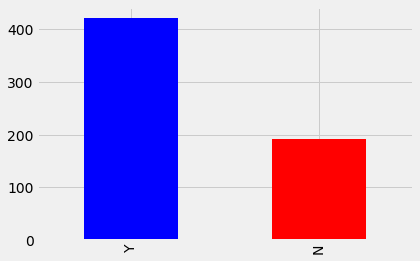

In [71]:
loan_status.plot(kind='bar',stacked=False,color=['b','r'])

# loan approval distribution across the regions using bar chart

In [75]:
#group the data according to the Loan_status and property area

property_and_loan = data.groupby(['Loan_Status','Property_Area'])

In [80]:
property_and_loan.head(1)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
17,LP001036,Female,No,0,Graduate,No,3510,0.0,76.0,360.0,0.0,Urban,N
25,LP001066,Male,Yes,0,Graduate,Yes,9560,0.0,191.0,360.0,1.0,Semiurban,Y
115,LP001401,Male,Yes,1,Graduate,No,14583,0.0,185.0,180.0,1.0,Rural,Y


In [81]:
property_and_loan.size()   #compute each group sizes

Loan_Status  Property_Area
N            Rural             69
             Semiurban         54
             Urban             69
Y            Rural            110
             Semiurban        179
             Urban            133
dtype: int64

In [85]:
property_and_loan.size().unstack(level=-1)

Property_Area,Rural,Semiurban,Urban
Loan_Status,,,
N,69,54,69
Y,110,179,133


In [87]:
property_and_loan=property_and_loan.size().unstack(level=0)

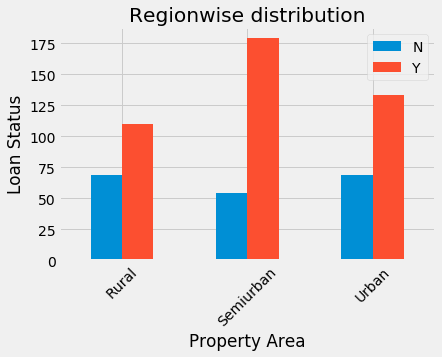

In [98]:
property_and_loan.plot(kind='bar',stacked=False)
plt.xlabel('Property Area')
plt.ylabel('Loan Status')
plt.title('Regionwise distribution')
plt.xticks(rotation=45)
plt.legend(loc='upper right')

# Does higher education result in a better guarantee in issuing loans?

In [99]:
#we need to see the distribution between education and loan_status using bar graph

In [100]:
education_and_loan = data.groupby(['Education','Loan_Status']).size().unstack()

In [101]:
education_and_loan

Loan_Status,N,Y
Education,,
Graduate,140,340
Not Graduate,52,82


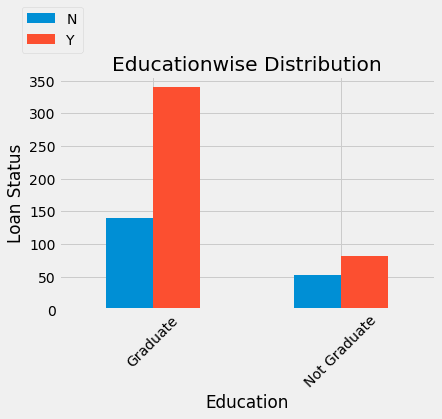

In [108]:
education_and_loan.plot(kind='bar',stacked=False,title='Educationwise Distribution')
plt.xlabel('Education')
plt.ylabel('Loan Status')
plt.xticks(rotation=45)
plt.legend(loc=(-.1,1.1))

# Whether being graduate or not also leads to different loan amount distribution by plotting an overlapping density plot of two values

In [109]:
#form new dataframe according to graduate and not_graduate


In [110]:
graduate = data[data['Education']=='Graduate']  #creating the new dataframe using conditional 

In [111]:
not_graduate = data[data['Education']=='Not Graduate']

In [113]:
np.all(graduate['Education']=='Graduate')

True

In [114]:
graduate.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [115]:
np.all(not_graduate['Education']=='Not Graduate')

True

In [116]:
not_graduate.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
16,LP001034,Male,No,1,Not Graduate,No,3596,0.0,100.0,240.0,NaN,Urban,Y
18,LP001038,Male,Yes,0,Not Graduate,No,4887,0.0,133.0,360.0,1.0,Rural,N
20,LP001043,Male,Yes,0,Not Graduate,No,7660,0.0,104.0,360.0,0.0,Urban,N


In [117]:
#ploting density plot on the LoanAmount column of the two dataframes
#using series.plot(kind='density')

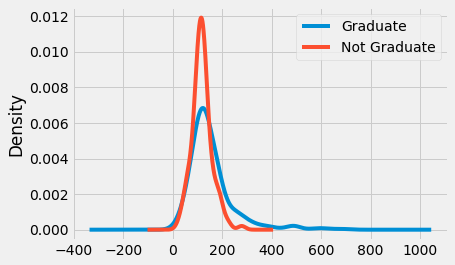

In [118]:
graduate['LoanAmount'].plot(kind='density',label='Graduate')
not_graduate['LoanAmount'].plot(kind='density',label='Not Graduate')
plt.legend()

# For any financial institution to be successful in its loan lending system, there has to be a correlation between the borrower's income and loan amount he is lent. Let's see how our company fares in that respect .

In [119]:
#for the correlation we need the scatter plot

Text(0.5, 1.0, 'Total Income')

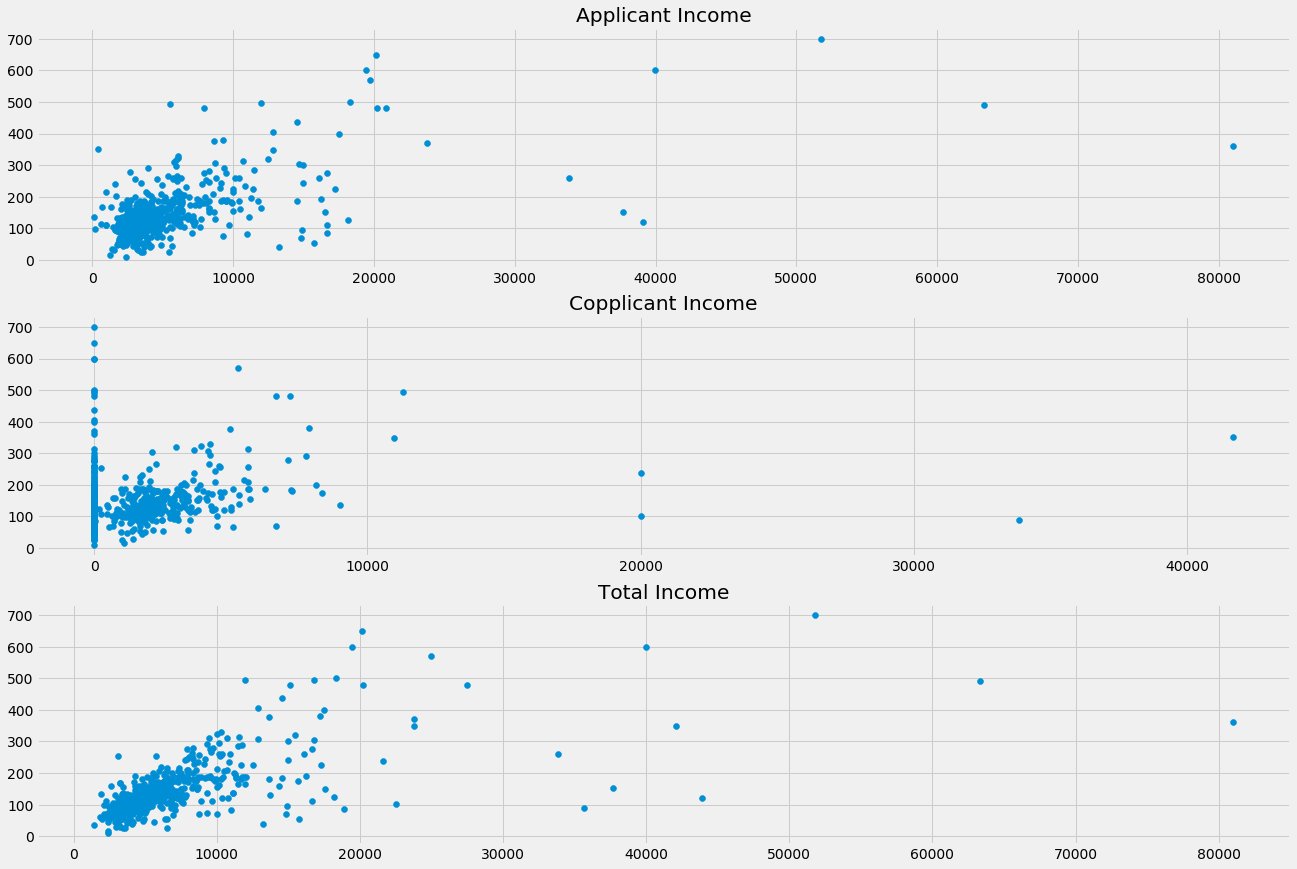

In [142]:
#Setting up the subplots
fig , ax = plt.subplots(3,1 , figsize=(20,14))

#Plotting scatter plot
ax[0].scatter(data['ApplicantIncome'],data['LoanAmount'])

#Setting the subplot axis title
ax[0].set_title('Applicant Income')

#Plotting scatter plot


ax[1].scatter(data['CoapplicantIncome'],data['LoanAmount'])

#Setting the subplot axis title
ax[1].set_title('Copplicant Income')


#Creating a new column 'TotalIncome'

data['TotalIncome'] = data['ApplicantIncome'] + data['CoapplicantIncome']

#Plotting scatter plot

ax[2].scatter(data['TotalIncome'],data['LoanAmount'])

ax[2].set_title("Total Income")


In [134]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0
